# Определение параметров PID-регулятора из характеристики переходного процесса

Рассмторим задачу проектирования ПИД-регулятора для системы, описываемой дифференциальным уравнением второго порядка. Целью работы является подбор коэффициентов регулятора ($K_p$, $K_d$, $K_i$) для требуемых параметров переходного процесса (rise time, overshoot, steady-state error). Подбор параметров производится двумя способами: c помощью анализа графика сигнала и за счет задания требуемого положения полюсов системы.\
Рассмотрим механическую систему:
![Система](https://ctms.engin.umich.edu/CTMS/Content/Introduction/Control/PID/figures/mass_spring_damper.png "ShowMyImage")
Тут $m$ = 1 кг - масса тележки, $b$ = 10 Нс/м - коэффициент дэмпфирования, $k$ = 20 Н/м - жесткость пружины, F = u(t) = 1 Н.\

Для этого рассмотрим простейшую механическую систему, определяемую ДУ:
$$ m 𝑦′′(𝑡) + b 𝑦′(𝑡) + k 𝑦(𝑡) = F(𝑡)$$ 

Используя преобразование Лапласа и нулевые начальные условия, получаем:
$$m 𝑠^2 𝑌(𝑠) + b 𝑠 𝑌(𝑠) + k𝑌(𝑠) = 𝑈(𝑠)$$

Передаточная функция определяется как отношение выходного сигнала(смещения) ко входному. Получаем тогда передаточную функцию: 

$$ H(s) = \frac{1}{ms^2+bs+k} $$

Передаточная функция PID-регулятора имеет вид: $$ H(s) = K_{p} + \frac{K_{i}}{s} + K_{d}s $$

Структурная схема системы с управляющим устройством ($С(s)$), объектом управления ($P(s)$) и отрицательной обратной связью имеет вид:  
![Блочная схема системы с PID](https://ctms.engin.umich.edu/CTMS/Content/Introduction/Control/PID/figures/feedback_block.png "ShowMyImage")

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import control as ctrl #(pip install control если пакет control не установлен)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#Инициализация системы
M = 1  #кг
B = 10 #Нс/м
K = 20 #Н/м

num = np.array([1])
den = np.array([M, B, K])
print('Передаточная функция системы без управления в терминах оператора Лапласа:',ctrl.tf(num, den))

Передаточная функция системы без управления в терминах оператора Лапласа: 
       1
---------------
s^2 + 10 s + 20



## P control

Пропорциональный регулятор уменьшает время нарастания сигнала (rise time), увеличивает перерегулирование (overshoot) и уменьшает (но не устраняет) статическую ошибку (steady state error).\

Передаточная функция замкнутого контура расматриваемой системы с единичной обратной связью и пропорциональным регулятором выглядит следующим образом:
$$T(s) = \frac{K_p}{m s^2 + bs + (k+K_p)}$$

Передаточная функция: 
      300
----------------
s^2 + 10 s + 320



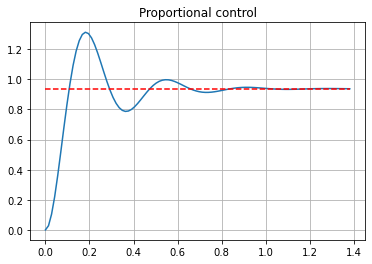

In [3]:
Kp = 300

def prop_control (Kp, num, den):
    num_arr = num.copy()
    den_arr = den.copy()
    
    num_arr *= Kp
    den_arr[2] += Kp
    return (num_arr, den_arr)

num_ar, den_ar = prop_control (Kp, num, den)
T_p = ctrl.tf(num_ar, den_ar)
t_p, y_p = ctrl.step_response(T_p)

print('Передаточная функция:',T_p)

output = num_ar[-1] / den_ar[-1]

plt.plot(t_p,y_p)
plt.plot(t_p,np.ones_like(y_p) * output,'--',color ='r')

plt.title("Proportional control")
plt.grid()
plt.show()


## PD control

Добавление контроля производной overshoot.\
Передаточная функция замкнутого контура данной системы с контроллером PD является:
$$T(s) = \frac{K_ds+K_p}{Ms^2 + (B+K_d)s + (K+K_p)}$$

Передаточная функция: 
   10 s + 300
----------------
s^2 + 20 s + 320



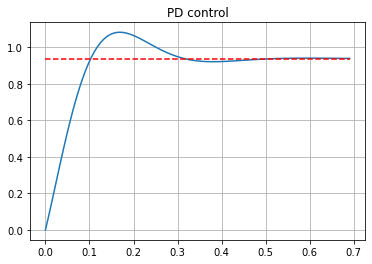

In [4]:
Kp = 300
Kd = 10

def prop_der_control (Kp,Kd, num, den):
    num_arr = num.tolist()
    num_arr[0] *= Kp
    num_arr.insert(0,Kd)
    num_arr = np.array(num_arr)
    
    den_arr = den.copy()
    den_arr[2] += Kp
    den_arr[1] += Kd
    
    return (num_arr, den_arr)

num_ar, den_ar = prop_der_control (Kp, Kd, num, den)
T_pd = ctrl.tf(num_ar, den_ar)
print('Передаточная функция:',T_pd)
t_pd, y_pd = ctrl.step_response(T_pd)


output =  num_ar[-1]/den_ar[-1]

plt.plot(t_pd,y_pd)
plt.plot(t_pd,np.ones_like(y_pd) * output,'--',color ='r')

plt.title("PD control")
plt.grid()
plt.show()


## PI control

Добавление интегрального управления имеет уменьшает время нарастания, увеличивает overshoot, а также уменьшает постоянную ошибку.\
Для данной системы передаточная функция с замкнутым контуром с PI-контроллером равна:
$$T(s) = \frac{K_ds+K_i}{Ms^3 + Bs^2 + (K+K_p)s + K_i}$$

Передаточная функция: 
       30 s + 70
------------------------
s^3 + 10 s^2 + 20 s + 70



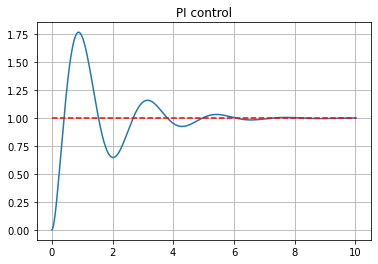

In [5]:
Kp = 30
Ki = 70

def prop_int_control (Kp,Ki, num, den):
    num_arr = num.tolist()
    num_arr[0] *= Kp
    num_arr.append(Ki)
    num_arr = np.array(num_arr)
    
    den_arr = den.copy()
    den_arr[2] += Kp
    den_arr = den.tolist()
    den_arr.append(Ki)
    den_arr = np.array(den_arr)
    
    return (num_arr, den_arr)

num_ar, den_ar = prop_int_control (Kp, Ki, num, den)
T_pi = ctrl.tf(num_ar, den_ar)
print('Передаточная функция:',T_pi)
t_pi, y_pi = ctrl.step_response(T_pi)


output =  num_ar[-1]/den_ar[-1]
plt.plot(t_pi,y_pi)
plt.plot(t_pi,np.ones_like(y_pi) * output,'--',color ='r')

plt.title("PI control")
plt.grid()
plt.show()

## PID control

Передаточная функция в случае PID контроля имеет вид:
$$T(s) = \frac{K_ds^2+K_ps+K_i}{Ms^3 + (B+Kd)s^2 + (K+K_p)s + K_i}$$

Передаточная функция: 
   50 s^2 + 350 s + 300
--------------------------
s^3 + 60 s^2 + 370 s + 300



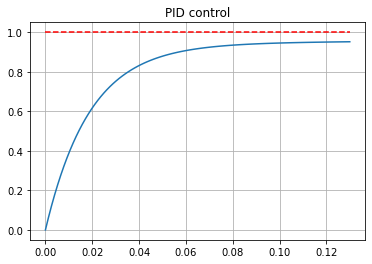

In [6]:
Kp = 350
Ki = 300
Kd = 50

def prop_int_derive_control (Kp, Kd, Ki, num, den):
    num_arr = num.tolist()
    num_arr[0] *= Kp
    num_arr.insert(0,Kd)
    num_arr.append(Ki)
    num_arr = np.array(num_arr)

    den_arr = den.copy()
    den_arr[2] += Kp
    den_arr[1] += Kd
    den_arr = den_arr.tolist()
    den_arr.append(Ki)
    den_arr = np.array(den_arr)
    return (num_arr, den_arr)

num_ar, den_ar = prop_int_derive_control (Kp, Kd, Ki, num, den)

T_pid = ctrl.tf(num_ar, den_ar)
print('Передаточная функция:',T_pid)
t_pid, y_pid = ctrl.step_response(T_pid)


output =  num_ar[-1]/den_ar[-1]

plt.plot(t_pid,y_pid)
plt.plot(t_pid,np.ones_like(y_pid) * output,'--',color ='r')

plt.title("PID control")
plt.grid()
plt.show()

## Интерактивный подбор параметров PID-регулятора

Алгоритм подбора параметров следующий:
* Установите значения $K_i$ и $K_d$ равными нулю. Увеличить $K_p$ до значения, где амплитуда уменьшилась на четверть после первого максимума
* Увеличивать $K_i$ до тех пор, пока на бесконечности не установится требуемый режим (steady-state error станет равной нулю).
* Увеличить $K_d$, если требуется, до тех пор, пока затухание не станет быстрым и колебания от требуемого значения не уменьшаться до допустимого уровня.

In [7]:
#Интерактивное изменение параметров регулятора
def series(Kp, Kd, Ki):
    M = 1
    B = 10 
    K = 20
    num = np.array([1])
    den = np.array([M, B, K])
    
    num_arr, den_arr = prop_int_derive_control (Kp, Kd, Ki, num, den)
    T = ctrl.tf(num_arr, den_arr)
    
    t, y = ctrl.step_response(T)
    print(T)

    plt.plot(t,y)
    plt.plot(t,np.ones_like(y),'--',color ='r')
    plt.grid()
    plt.show()
    return()

interact(series, Kp=(1,500,1),Kd=(0,300,1),Ki=(0,300,1)) #Здесь можно изменить ограничения на слайдерах
#Примерный набор (Kp,Kd,Ki) = (150,13,300)

interactive(children=(IntSlider(value=250, description='Kp', max=500, min=1), IntSlider(value=150, description…

<function __main__.series(Kp, Kd, Ki)>

## Подбор параметров PID-регулятора через анализ полюсов

Достигнем асимптотической устойчивости системы с PID регулятором с анализа полюсов передаточной функции. Размещение одного полюса на расстоянии 5$\zeta\omega_n$ от мнимой оси, а двух других соответсвующим образом, приводит к следующей диаграмме:
![Диаграмма](diag.png "ShowMyImage")
Здесь $\zeta$ и $\omega_n$ - некоторые параметры, определяющие положения полюсов. Такое расположение обеспечивает асимптотическую устойчивость системы.

Таким образом, знаменатель можно разложить на множители,исходя их положения выбранных полюсов:
$$ s^3 + s^2(\frac{B+K_d}{M})+s(\frac{K+K_p}{M}) + \frac{K_i}{M} = (s+ 5\zeta\omega_n)(s^2+2\zeta\omega_ns +\omega_n^2)$$
Тогда после решения данной системы, можно получить выражения для коэффициентов регулятора:
$$K_d = 7M\zeta\omega_n - B$$
$$K_p = M(10\zeta^2\omega_n^2 + \omega_n^2)  - K$$
$$K_d = 5M\zeta\omega_n^3$$

Используя следующий критерий: 2% времени установки меньше 1 секунды. Получим выражения для времени установки и времени роста через параметры $\zeta$ и $\omega_n$:
$$t_s = \frac{4}{\zeta\omega_n}$$ 
$$t_r = \frac{\pi-\beta}{\omega_d}$$
Или при $\beta = atan(\frac{\omega_n\sqrt(1-\zeta^2)}{\zeta\omega_n})$:
$$t_r = \frac{\pi-atan(\frac{\omega_n\sqrt(1-\zeta^2)}{\zeta\omega_n})}{\omega_d}$$


  46 s^2 + 746.1 s + 5043
---------------------------
s^3 + 55 s^2 + 766 s + 5043



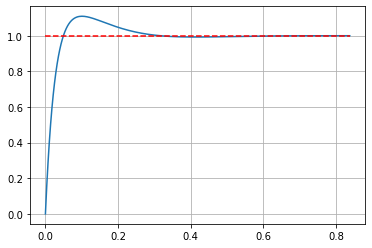

In [235]:
#Поиск параметров при известных ограничениях на время

import scipy.optimize as sp

def func(x):
    #Здесь ставятся ограничения на время установления и время роста
    tr = 0.3 #сек
    ts = 0.5 #сек
    return [4 / (x[0]*x[1]) - ts,
            (np.pi - np.arctan(np.sqrt(1-x[0]*x[0])/x[0]))/(x[1]*np.sqrt(1-x[0]*x[0])) - tr]


root = sp.fsolve(func, [0.2, 22]) 

zeta = root[0] 
omega = root[1]

Kd_pole = 7*M*zeta*omega - B
Kp_pole = M*(10*zeta**2*omega**2+omega**2)-K
Ki_pole = 5*M*zeta*omega**3

num_arr, den_arr = prop_int_derive_control (Kp_pole, Kd_pole, Ki_pole, num, den)
T_pole = ctrl.tf(num_arr, den_arr)

t_pole, y_pole = ctrl.step_response(T_pole)
print(T_pole)

plt.plot(t_pole,y_pole)
plt.plot(t_pole,np.ones_like(y_pole),'--',color ='r')
plt.grid()
plt.show()

(array([-38.50967885+0.j        ,  -8.24516057+7.93601635j,
        -8.24516057-7.93601635j]), array([-8.10960439+6.6236118j, -8.10960439-6.6236118j]))


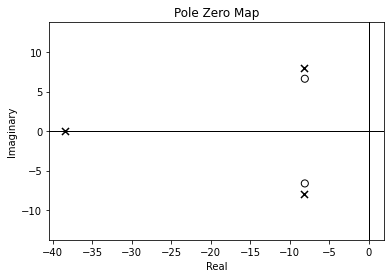

In [233]:
#Диаграмма полюсов
print(ctrl.pzmap(T_pole))